In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
store=pd.read_csv('Store.csv')
store.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [5]:
store.shape

(932, 10)

In [3]:
store.describe()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,932.000000,919.000000,919.000000,931.000000,924.000000,917.000000,932.000000,9.320000e+02
mean,466.500000,8229.727965,11018.752992,13072.092374,1511.862554,1794.924755,785.579399,6.084695e+04
std,269.189524,2561.985008,2543.920590,2586.456161,790.969660,468.159457,265.546853,5.025364e+04
min,1.000000,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+02
25%,233.750000,6476.000000,9354.500000,11301.500000,1318.000000,1583.000000,600.000000,4.658000e+04
50%,466.500000,8230.000000,11161.000000,13163.000000,1480.500000,1774.000000,780.000000,5.866000e+04
75%,699.250000,9937.000000,12670.500000,14817.000000,1655.000000,1982.000000,970.000000,7.187250e+04
max,932.000000,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+06


In [6]:
store.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Metro', 'Store_Area',
       'Items_Available', 'Parking', 'Coupon_Category', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [8]:
store.isnull().sum()

Observation              0
Dist_Taxi               13
Dist_Market             13
Dist_Metro               1
Store_Area               8
Items_Available         15
Parking                  0
Coupon_Category          0
Daily_Customer_Count     0
Store_Sales              0
dtype: int64

In [10]:
store.nunique()

Observation             932
Dist_Taxi               884
Dist_Market             866
Dist_Metro              895
Store_Area              595
Items_Available         626
Parking                   4
Coupon_Category           3
Daily_Customer_Count    131
Store_Sales             849
dtype: int64

# treating the null values

In [11]:
store.Dist_Taxi.fillna(store.Dist_Taxi.median(),inplace=True)

In [12]:
store.Dist_Market.fillna(store.Dist_Market.median(),inplace=True)

In [13]:
store.Dist_Metro.fillna(store.Dist_Metro.median(),inplace=True)

In [14]:
store.Store_Area.fillna(store.Store_Area.median(),inplace=True)

In [15]:
store.Items_Available.fillna(store.Items_Available.median(),inplace=True)

In [16]:
store.isnull().sum()

Observation             0
Dist_Taxi               0
Dist_Market             0
Dist_Metro              0
Store_Area              0
Items_Available         0
Parking                 0
Coupon_Category         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

# Ploting different graphs

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


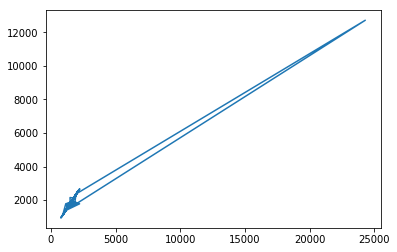

In [18]:
plt.plot(store.Store_Area,store.Items_Available)
plt.show()

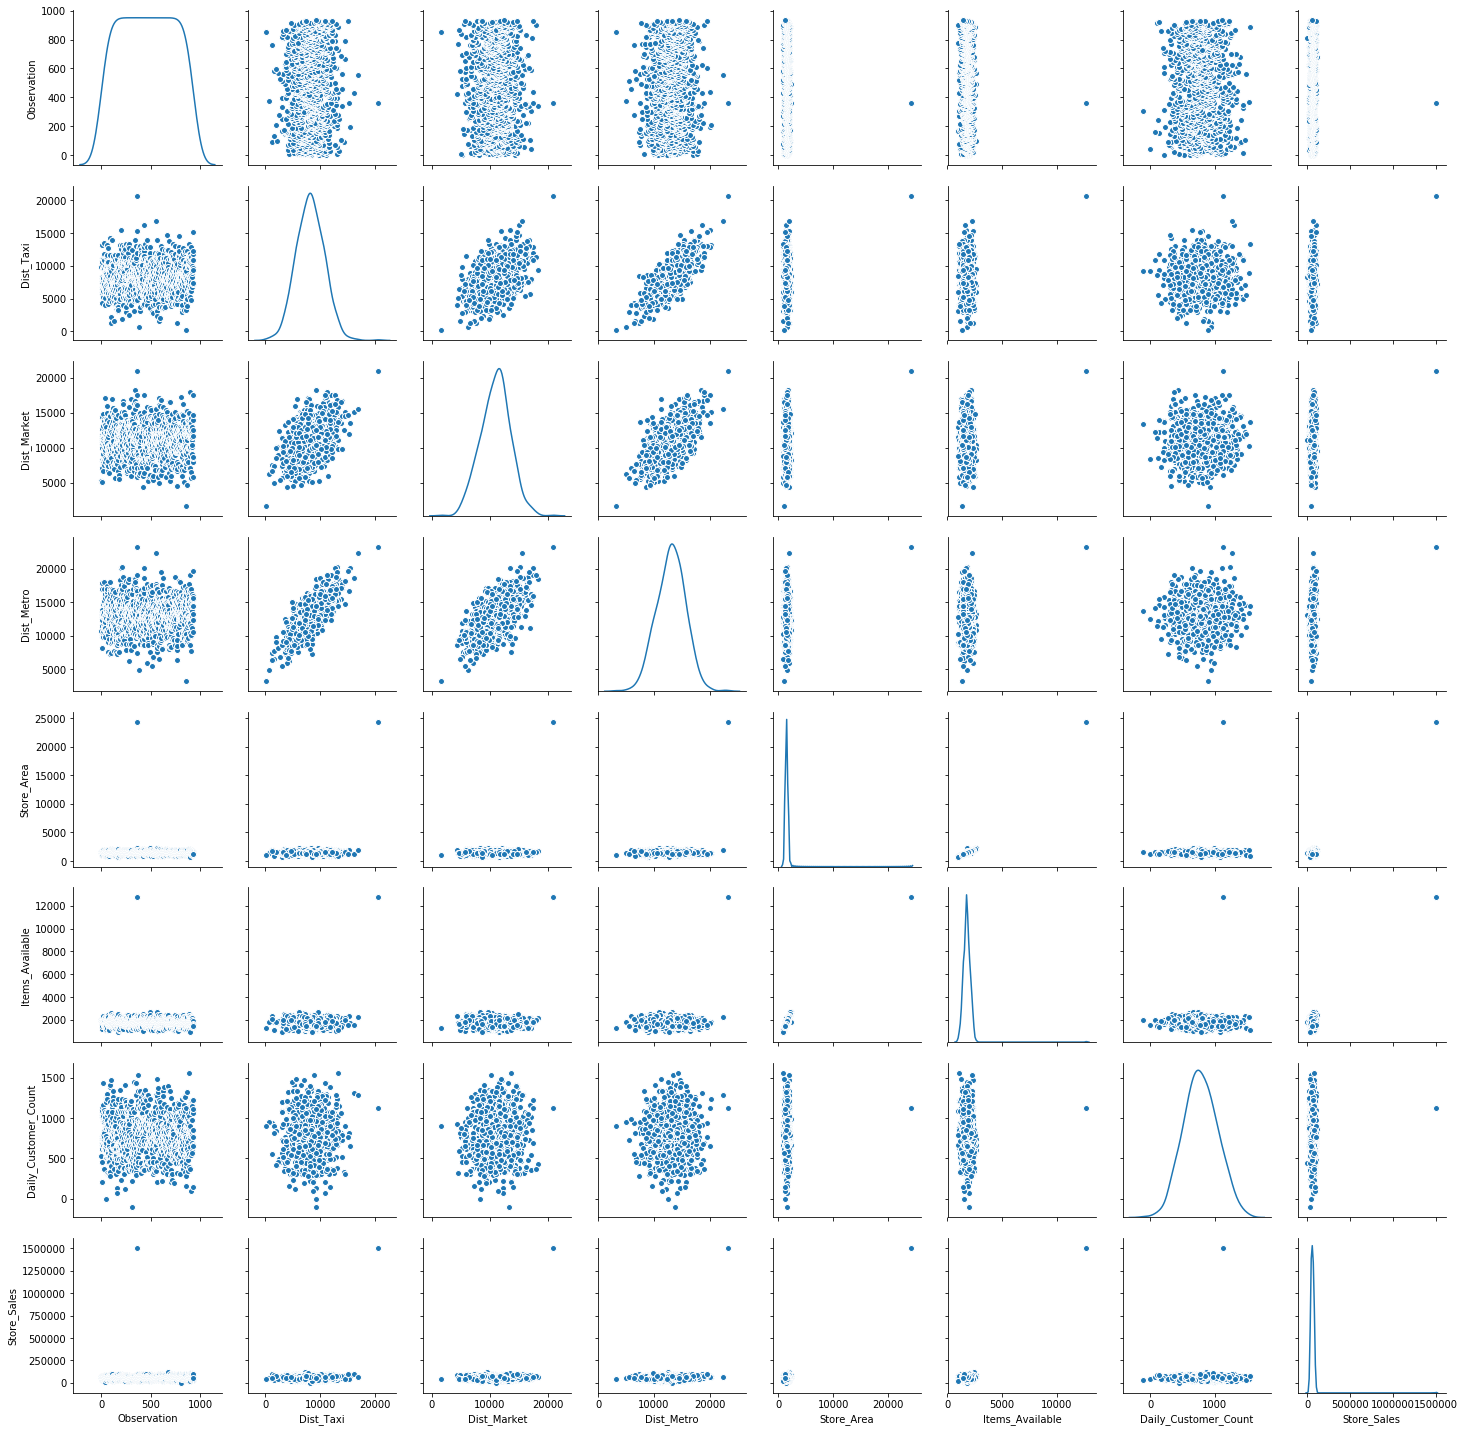

In [20]:
sns.pairplot(data=store,diag_kind='kde')
plt.show()

# Removing the outliers

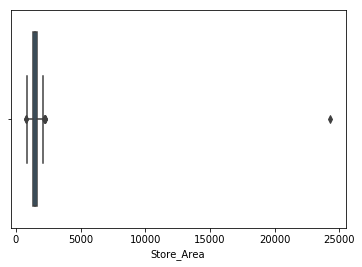

In [21]:
sns.boxplot(x='Store_Area',data=store)# there is one large store which turns out to be an outlier

In [22]:
store[store.Store_Area==max(store.Store_Area)]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,1500000


In [24]:
store.drop(360,axis=0,inplace=True)

In [25]:
store[store.Store_Area==max(store.Store_Area)]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
490,491,6063.0,8269.0,10928.0,2229.0,2667.0,Covered,CAT A,660,87410


# Looking at sales amount if it get impacted by parking

In [27]:
store.Parking.value_counts()

Open            372
Not Provided    227
Covered         187
No Parking      145
Name: Parking, dtype: int64

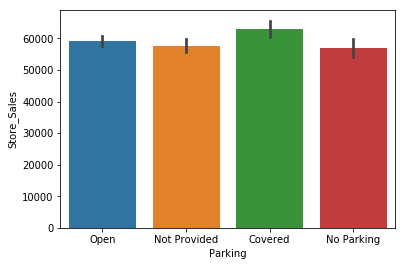

In [30]:
sns.barplot(x=store['Parking'],y=store['Store_Sales'])
#the samll bar above each bar is the confidence interval around the mean
#Here we assume the rest of the parameters are same hence we are now only looking at the parking issue
#This is the univariant analysis

In [31]:
store.groupby('Parking').Store_Sales.mean()
#the avarage sales get affected if a store has parking and its type

Parking
Covered         63109.732620
No Parking      56994.620690
Not Provided    57747.048458
Open            59233.978495
Name: Store_Sales, dtype: float64

To sintifically understand that if parking is impacting the sales amount we need to do an ANOVA test(one way Anova )as we are lokking at 4 different types of parking. 

# ANOVA TEST(One way)

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [34]:
mod=ols('Store_Sales~Parking',data=store).fit()
#The 1st variable is the continous value and comparing with the catagorical value
aov_table=sm.stats.anova_lm(mod,type=1)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


#if sum_sq is large then there is a difference in the parking
#if the sum_sq is small all the parking will have same mean hence we can say that all the different parking are more or less same
#The residual of sum_sq says that if other factors are influencing the sales of store
#mean_sq is the sum_sq divided by the df
#The mean square is out af all the mean the sq_mean is 4.033 times different.
#F-distribution- It says what would have happen to the mean if all the types of parking mean would have been same. It tells how large is the mean sq_mean.
#The answer to the F-distribution is given by the column PR(>F) which is it is larger by 0.35 units.
#f the P_values is smaler 0.05 hence the parking makes a difference to store_sales

# Now the Question is covered parking leads to more sales and by how much 

Comparing both covered parking and parking not provided

For this we can do a 2 sample t-test

Ho-Parking does not make much difference
Ha-Covered Parking leads to make much sales  

In [35]:
#setting the data for 2 sample t-test
Saleson_covered_parking=store.Store_Sales[store.Parking=='Covered']
saleson_no_parking=store.Store_Sales[store.Parking=='Not Provided']

In [38]:
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon,ttest_ind_from_stats
import scipy.stats as stats

In [39]:
t_statistic,p_value=stats.ttest_ind(saleson_no_parking,Saleson_covered_parking)


In [40]:
stats.ttest_ind(saleson_no_parking,Saleson_covered_parking)
#the code is giving a 2 sided p-values


Ttest_indResult(statistic=-3.1502380424373726, pvalue=0.0017503522949873288)

statistics is the scaled value and it is negative because covered parking will provide more sales
We used one tail t test as we know that the covered parking will provide more sales
The ststistics says that the parking not provided is 3.15 standard deviation away from the covered parking.

In [41]:
#TO get the 1 sided p value we divide the p value by 2
0.0017503522949873288/2#Hear we say that the value is very less then 0.05 so we reject the null value

0.0008751761474936644

In [42]:
1-0.0008751761474936644
#When we go  for other side of hypothesis test we the value cannot be rejected
#as it ts more then the p-value 0.05.

0.9991248238525063

Hence we conclude that covered parking is important for the growth in sales.


# Relationship bewteen Coupon and Parking

Coupon Catagory

In [43]:
store.Coupon_Category.nunique()

3

In [44]:
store.Coupon_Category.value_counts()

CAT B    364
CAT A    329
CAT C    238
Name: Coupon_Category, dtype: int64

Creating the array of parking and coupon so that we can feed in chi-square

In [52]:
Coupon_parking_array=pd.crosstab(store.Coupon_Category,store.Parking)

In [53]:
Coupon_parking_array

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,75,51,82,121
CAT B,63,53,89,159
CAT C,49,41,56,92


In [71]:
store.groupby(['Coupon_Category','Parking']).Store_Sales.mean()

Coupon_Category  Parking     
CAT A            Covered         77047.333333
                 No Parking      71999.607843
                 Not Provided    72015.975610
                 Open            74295.206612
CAT B            Covered         58140.793651
                 No Parking      53021.886792
                 Not Provided    53213.595506
                 Open            55948.742138
CAT C            Covered         48165.306122
                 No Parking      43465.365854
                 Not Provided    44058.214286
                 Open            45102.934783
Name: Store_Sales, dtype: float64

In [72]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(Coupon_parking_array)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d'
      %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 5.59851 P value 0.469631 Degrees of freedom 6


In [55]:
stats.chi2_contingency(Coupon_parking_array)

(5.598509055616617,
 0.4696314046542073,
 6,
 array([[ 66.08270677,  51.2406015 ,  80.21804511, 131.45864662],
        [ 73.11278195,  56.69172932,  88.7518797 , 145.44360902],
        [ 47.80451128,  37.06766917,  58.03007519,  95.09774436]]))

Now as we can say that There is no relationship between coupons and parking

# Relating both parking and Coupons to Sales and amount

For setting relation of parking and coupon with sales we need to do a 2 way anova

In [62]:
mod_anova2=ols('Store_Sales~ Parking+Coupon_Category',data=store).fit()
#The 1st variable is the continous value and comparing with the catagorical value
aov_table_2=sm.stats.anova_lm(mod_anova2,type=1)
print(aov_table_2)

                    df        sum_sq       mean_sq           F         PR(>F)
Parking            3.0  4.033839e+09  1.344613e+09    8.270635   1.965845e-05
Coupon_Category    2.0  1.233702e+11  6.168510e+10  379.421402  4.743366e-121
Residual         925.0  1.503835e+11  1.625768e+08         NaN            NaN


The difference between the type 1 and type 2 is only the conclusion.Type 1 does not give any interaction between the 2 columns.
but if type 2 then if says the combination of 2 columns

In [66]:
mod_anova2=ols('Store_Sales~ Parking+Coupon_Category+Parking:Coupon_Category',data=store).fit()
#The 1st variable is the continous value and comparing with the catagorical value
aov_table_2=sm.stats.anova_lm(mod_anova2,type=1)
print(aov_table_2)

                            df        sum_sq       mean_sq           F  \
Parking                    3.0  4.033839e+09  1.344613e+09    8.221073   
Coupon_Category            2.0  1.233702e+11  6.168510e+10  377.147746   
Parking:Coupon_Category    6.0  7.474572e+07  1.245762e+07    0.076167   
Residual                 919.0  1.503087e+11  1.635569e+08         NaN   

                                PR(>F)  
Parking                   2.109760e-05  
Coupon_Category          2.581362e-120  
Parking:Coupon_Category   9.983139e-01  
Residual                           NaN  


As the parking and coupon category is 9.98 hence we cas say that there is no combination effect on the model

The parking variablity is 8 times in within cell
The across coupon variability is 379 times the within cells

In [65]:
store.groupby('Coupon_Category').Store_Sales.mean()

Coupon_Category
CAT A    73998.662614
CAT B    55233.214286
CAT C    45205.504202
Name: Store_Sales, dtype: float64

# Anova test for Coupon Category

In [75]:
mod_cupon=ols('Store_Sales~Coupon_Category',data=store).fit()
#The 1st variable is the continous value and comparing with the catagorical value
aov_table_cupon=sm.stats.anova_lm(mod_cupon,type=1)
print(aov_table_cupon)

                    df        sum_sq       mean_sq           F         PR(>F)
Coupon_Category    2.0  1.243806e+11  6.219031e+10  376.206061  2.235255e-120
Residual         928.0  1.534069e+11  1.653092e+08         NaN            NaN


# Item Available and Store Sales

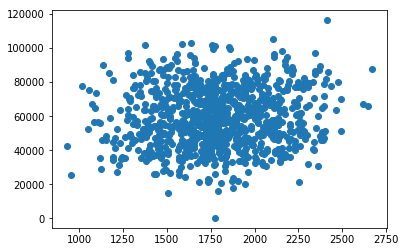

In [82]:
plt.scatter(x=store.Items_Available,y=store.Store_Sales)

As we can see that the increase in items will not increase the sales

In [85]:
median_value=store.Items_Available.median()

In [95]:
less=store[store.Items_Available<median_value]
more=store[store.Items_Available>=median_value]

In [96]:
t_statistic,p_value=stats.ttest_ind(less.Store_Sales,more.Store_Sales)
print(p_value)

0.14555456301795072


In [97]:
less.Store_Sales.mean()

58459.56140350877

In [98]:
more.Store_Sales.mean()

60109.05263157895

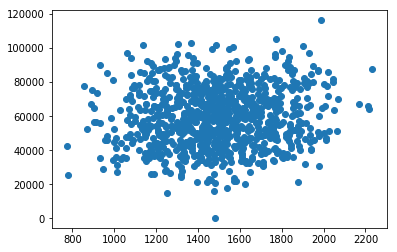

In [100]:
plt.scatter(store.Store_Area,store.Store_Sales)
plt.show()

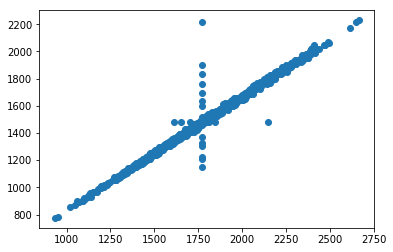

In [102]:
plt.scatter(store.Items_Available,store.Store_Area)
plt.show()

In [104]:
store_area_median=store.Store_Area.median()

In [105]:
less_storesize=store[store.Store_Area<store_area_median]
more_storesize=store[store.Store_Area>=store_area_median]


This plot says that the number of items a store has is having a bigger area.
There is a strong relationship between items and area but independently that does not have any impact on the sales

In [109]:
t_statistic,p_value=stats.ttest_ind(less_storesize.Store_Sales,more_storesize.Store_Sales)
print(t_statistic,p_value)

-1.9235259183826539 0.05471936102864674


# Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression

In [112]:
x=pd.DataFrame(store.Store_Area)
y=store.Store_Area

In [113]:
lr_model=LinearRegression()
lr_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
from statsmodels.api import add_constant

In [115]:
x2=add_constant(x)
log=sm.OLS(y,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Store_Area   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.854e+32
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:15:06   Log-Likelihood:                 25149.
No. Observations:                 931   AIC:                        -5.029e+04
Df Residuals:                     929   BIC:                        -5.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.393e-13   8.93e-14     -3.801      0.0

In [116]:
x1=pd.DataFrame(store.Items_Available)
y1=store.Items_Available

In [117]:
lr_model1=LinearRegression()
lr_model1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
x2=add_constant(x1)
log=sm.OLS(y1,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Items_Available   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.044e+32
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:21:47   Log-Likelihood:                 24522.
No. Observations:                 931   AIC:                        -4.904e+04
Df Residuals:                     929   BIC:                        -4.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.336e-13   1.77e-13     

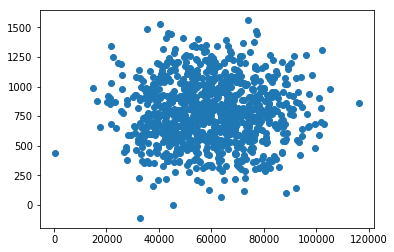

In [121]:
plt.scatter(store.Store_Sales,store.Daily_Customer_Count)

In [122]:
x2=pd.DataFrame(store.Daily_Customer_Count)
y2=store.Daily_Customer_Count

In [123]:
lr_model2=LinearRegression()
lr_model2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
x2=add_constant(x2)
log=sm.OLS(y2,x2)
result=log.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     Daily_Customer_Count   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                  1.000
Method:                   Least Squares   F-statistic:                 6.252e+32
Date:                  Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                          15:26:58   Log-Likelihood:                 25454.
No. Observations:                   931   AIC:                        -5.090e+04
Df Residuals:                       929   BIC:                        -5.090e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [125]:
store.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [139]:
x3=store.iloc[:,1:4]
y3=store.Store_Sales


In [140]:
lr_model3=LinearRegression()
lr_model3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
x2=add_constant(x3)
log=sm.OLS(y3,x3)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2934.
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:34:56   Log-Likelihood:                -10497.
No. Observations:                 931   AIC:                         2.100e+04
Df Residuals:                     928   BIC:                         2.101e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Dist_Taxi      -0.9790      0.402     -2.435      

# Analyzing with Daily customer and Parking

In [143]:
mod_Customer=ols('Daily_Customer_Count~Parking',data=store).fit()
aov_model_customer=sm.stats.anova_lm(mod_Customer,type=1)

In [144]:
print(aov_model_customer)

             df        sum_sq        mean_sq         F    PR(>F)
Parking     3.0  3.641704e+05  121390.129005  1.726782  0.159852
Residual  927.0  6.516666e+07   70298.450669       NaN       NaN


# Daily Customer with Coupon Category

In [146]:
mod_Customer1=ols('Daily_Customer_Count~Coupon_Category',data=store).fit()
aov_model_customer1=sm.stats.anova_lm(mod_Customer1,type=1)

In [147]:
print(aov_model_customer1)

                    df        sum_sq       mean_sq         F    PR(>F)
Coupon_Category    2.0  6.617100e+04  33085.499961  0.469006  0.625772
Residual         928.0  6.546466e+07  70543.818057       NaN       NaN


In [148]:
store.groupby('Coupon_Category').Daily_Customer_Count.mean()

Coupon_Category
CAT A    796.018237
CAT B    782.005495
CAT C    775.168067
Name: Daily_Customer_Count, dtype: float64

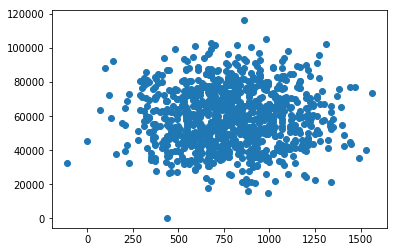

In [149]:
plt.scatter(store.Daily_Customer_Count,store.Store_Sales)

In [153]:
store_final=pd.get_dummies(store)
store_final.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Parking_Covered,Parking_No Parking,Parking_Not Provided,Parking_Open,Coupon_Category_CAT A,Coupon_Category_CAT B,Coupon_Category_CAT C
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,530,66490,0,0,0,1,0,1,0
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,210,39820,0,0,1,0,0,1,0
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,720,54010,0,0,1,0,1,0,0
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,620,53730,1,0,0,0,0,1,0
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,450,46620,0,0,1,0,0,1,0


In [157]:
x4=store_final.drop(['Store_Sales','Observation'],axis=1)
y4=store_final.Store_Sales

In [158]:
lr_model4=LinearRegression()
lr_model4.fit(x4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
x2=add_constant(x4)
log=sm.OLS(y4,x4)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     79.28
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          5.04e-125
Time:                        15:49:28   Log-Likelihood:                -10094.
No. Observations:                 931   AIC:                         2.021e+04
Df Residuals:                     919   BIC:                         2.027e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Dist_Taxi                 0.36